In [76]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


In [77]:
train_labels = []
train_samples = []

Data Creation
For this simple task, we'll be creating our own example data set.

As motivation for this data, let's suppose that an experimental drug was tested on individuals ranging from age 13 to 100 in a clinical trial. The trial had 2100 participants. Half of the participants were under 65 years old, and the other half was 65 years of age or older.

The trial showed that around 95% of patients 65 or older experienced side effects from the drug, and around 95% of patients under 65 experienced no side effects, generally showing that elderly individuals were more likely to experience side effects.

Ultimately, we want to build a model to tell us whether or not a patient will experience side effects solely based on the patient's age. The judgement of the model will be based on the training data.

In [78]:
for i in range(50):
  # The ~5% of younger individuals who did experience side effects
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    random_younger=randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    random_older=randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)


In [79]:
print(len(train_samples))
print(len(train_labels))

2100
2100


Data Processing

In [80]:
train_labels=np.array(train_labels)
train_samples=np.array(train_samples)
train_labels,train_samples=shuffle(train_labels,train_samples)

In [81]:
print(train_labels)
print(train_samples)

[1 1 0 ... 0 1 1]
[18 20 67 ... 80 29 41]


In [82]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

(array([173., 206., 183., 157., 156., 203., 222., 255., 291., 254.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

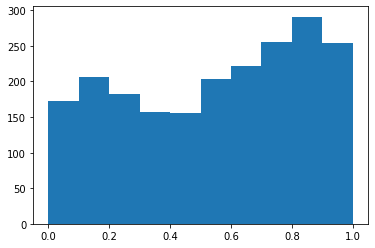

In [83]:
plt.hist(scaled_train_samples)

In [84]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy


In [85]:
model=Sequential([
    Dense(units=16, input_shape=(1,),activation='relu'),
    Dense(units=32,activation='relu'),
    Dense(units=2,activation='softmax')
])

In [86]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

 
 

1.   sparse_categorical_crossentropy - given that our labels are in integer format.
2.   binary_crossentropy - we have only two classes (the last layer would need to use sigmoid)



In [88]:
model.fit(x=scaled_train_samples,y=train_labels,validation_split=0.1,batch_size=10,epochs=30,shuffle=True,verbose=2)

Epoch 1/30
189/189 - 1s - loss: 0.6873 - accuracy: 0.6471 - val_loss: 0.6712 - val_accuracy: 0.6524
Epoch 2/30
189/189 - 0s - loss: 0.6518 - accuracy: 0.7122 - val_loss: 0.6245 - val_accuracy: 0.8286
Epoch 3/30
189/189 - 0s - loss: 0.6033 - accuracy: 0.8344 - val_loss: 0.5782 - val_accuracy: 0.8476
Epoch 4/30
189/189 - 0s - loss: 0.5552 - accuracy: 0.8704 - val_loss: 0.5300 - val_accuracy: 0.8762
Epoch 5/30
189/189 - 0s - loss: 0.5064 - accuracy: 0.8905 - val_loss: 0.4770 - val_accuracy: 0.9000
Epoch 6/30
189/189 - 0s - loss: 0.4552 - accuracy: 0.9101 - val_loss: 0.4297 - val_accuracy: 0.9190
Epoch 7/30
189/189 - 0s - loss: 0.4099 - accuracy: 0.9153 - val_loss: 0.3854 - val_accuracy: 0.9190
Epoch 8/30
189/189 - 0s - loss: 0.3678 - accuracy: 0.9243 - val_loss: 0.3450 - val_accuracy: 0.9333
Epoch 9/30
189/189 - 0s - loss: 0.3300 - accuracy: 0.9286 - val_loss: 0.3097 - val_accuracy: 0.9571
Epoch 10/30
189/189 - 0s - loss: 0.2969 - accuracy: 0.9376 - val_loss: 0.2782 - val_accuracy: 0.9571

**Inference from Above model**

**Creating The Test Set**

In [89]:
test_samples=[]
test_lables=[]
for i in range(10):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_lables.append(1)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_lables.append(0)

for i in range(200):
  random_younger=randint(13,64)
  test_samples.append(random_younger)
  test_lables.append(1)

  random_older=randint(65,100)
  test_samples.append(random_older)
  test_lables.append(0)

test_labels=np.array(test_lables)
test_samples=np.array(test_samples)

test_labels,test_samples=shuffle(test_labels,test_samples)
scaled_test_samples=scaler.fit_transform(test_samples.reshape(-1,1))

**Prediction**
Evaluating The Test Set


In [90]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=2
)

42/42 - 0s


In [91]:
predictions

array([[0.9966055 , 0.00339454],
       [0.99106205, 0.0089379 ],
       [0.63410336, 0.36589658],
       [0.00258397, 0.997416  ],
       [0.00275196, 0.997248  ],
       [0.00585459, 0.9941454 ],
       [0.00256722, 0.99743277],
       [0.08108059, 0.91891944],
       [0.28111312, 0.7188869 ],
       [0.94732076, 0.05267922],
       [0.05451981, 0.9454802 ],
       [0.00255479, 0.9974452 ],
       [0.00289227, 0.9971077 ],
       [0.9902429 , 0.00975707],
       [0.00258397, 0.997416  ],
       [0.9951702 , 0.00482979],
       [0.9966055 , 0.00339454],
       [0.95697945, 0.04302057],
       [0.14311017, 0.85688984],
       [0.00585459, 0.9941454 ],
       [0.0984055 , 0.90159446],
       [0.94732076, 0.05267922],
       [0.63410336, 0.36589658],
       [0.72616166, 0.2738383 ],
       [0.9951702 , 0.00482979],
       [0.9947255 , 0.00527446],
       [0.00272922, 0.99727076],
       [0.99106205, 0.0089379 ],
       [0.00314043, 0.99685955],
       [0.00585459, 0.9941454 ],
       [0.

In [92]:
rounded_prediction=np.argmax(predictions,axis=1)

In [93]:
rounded_prediction

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,

**Create A Confusion Matrix For Neural Network Predictions**

In [94]:
%matplotlib inline
from sklearn.metrics import  confusion_matrix
import matplotlib.pyplot as plt
import itertools

cm=confusion_matrix(y_true=test_lables,y_pred=rounded_prediction)
cm

array([[112,  98],
       [100, 110]])

In [95]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[112  98]
 [100 110]]


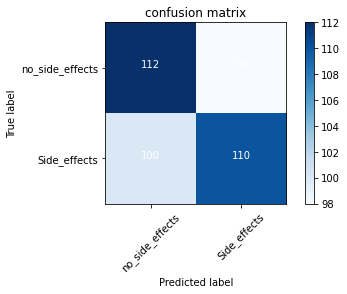

In [96]:
plot_confusion_matrix(cm,classes=['no_side_effects','Side_effects'],title='confusion matrix')

### **Save the Model**

Saving And Loading The Model In Its Entirety

In [97]:
model.save('models/medical_trial_model.h5')

In [100]:
from tensorflow.keras.models import load_model
new_model=load_model('models/medical_trial_model.h5')

In [101]:
new_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


**Saving And Loading Only The Architecture Of The Model**

In [102]:
json_string=model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential_3", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_9_input"}}, {"class_name": "Dense", "config": {"name": "dense_9", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_10", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, 

In [103]:
from tensorflow.keras.models import model_from_json
model_architecture=model_from_json(json_string)

In [104]:
model_architecture.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


**Saving And Loading The Weights Of The Model**

In [105]:
model.save_weights('models/my_model_weights.h5')

In [106]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('models/my_model_weights.h5')